## Log Transformation

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


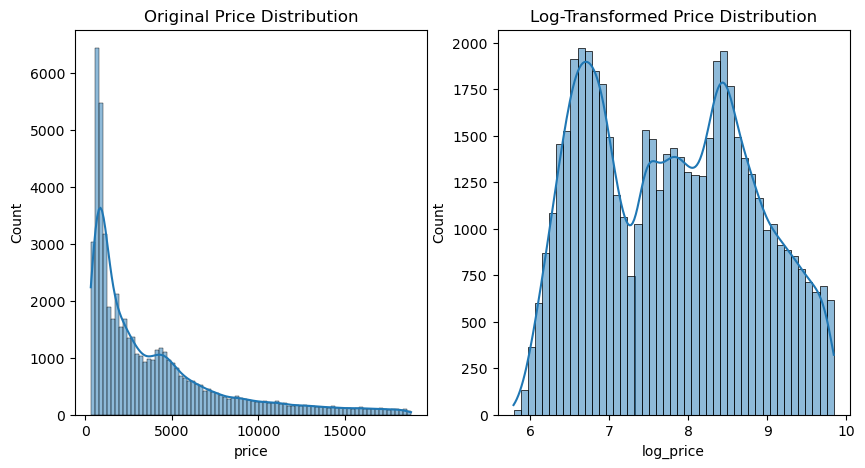

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load a sample dataset (e.g., the 'diamonds' dataset from seaborn)
data = sns.load_dataset('diamonds')

# Display the first few rows of the dataset
print(data.head())

# Plot the original distribution of the 'price' column
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['price'], kde=True)
plt.title('Original Price Distribution')

# Apply log transformation to the 'price' column
data['log_price'] = np.log(data['price'])

# Plot the transformed distribution of the 'price' column
plt.subplot(1, 2, 2)
sns.histplot(data['log_price'], kde=True)
plt.title('Log-Transformed Price Distribution')

plt.show()

## Box-Cox Transformation


   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


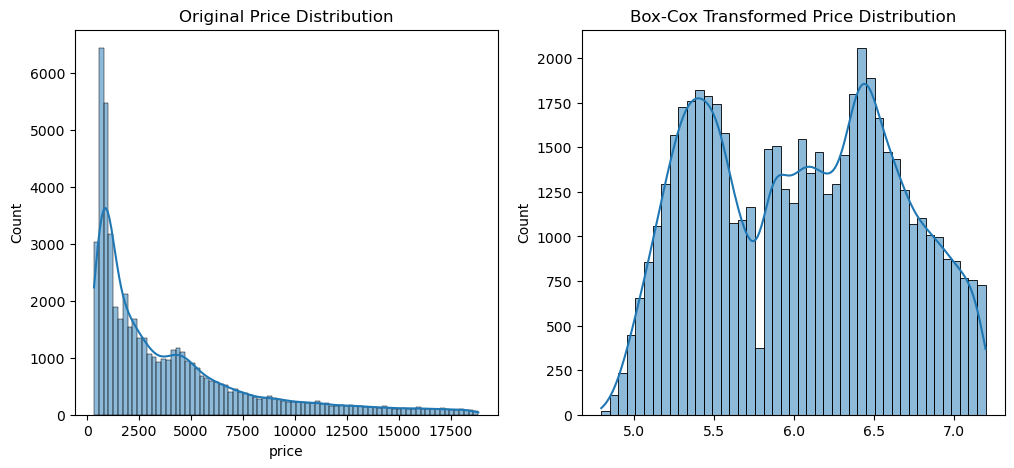

Optimal lambda value for Box-Cox transformation: -0.0674


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

# Load a sample dataset (e.g., the 'diamonds' dataset from seaborn)
data = sns.load_dataset('diamonds')

# Display the first few rows of the dataset
print(data.head())

# Plot the original distribution of the 'price' column
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['price'], kde=True)
plt.title('Original Price Distribution')

# Apply Box-Cox transformation to the 'price' column
# Note: Box-Cox requires positive data, so ensure all values are > 0
price_positive = data['price'] + 1  # Adding 1 to handle zero values
boxcox_transformed, lambda_value = boxcox(price_positive)

# Plot the transformed distribution of the 'price' column
plt.subplot(1, 2, 2)
sns.histplot(boxcox_transformed, kde=True)
plt.title('Box-Cox Transformed Price Distribution')

plt.show()

# Print the optimal lambda value
print(f'Optimal lambda value for Box-Cox transformation: {lambda_value:.4f}')


## Trimming


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


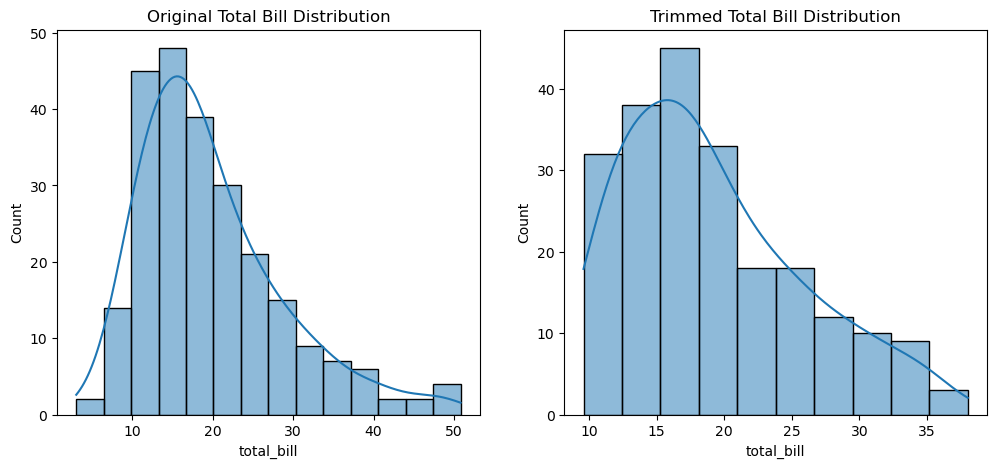

Original dataset size: 244
Trimmed dataset size: 218


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load a sample dataset (e.g., the 'tips' dataset from seaborn)
data = sns.load_dataset('tips')

# Display the first few rows of the dataset
print(data.head())

# Plot the original distribution of the 'total_bill' column
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['total_bill'], kde=True)
plt.title('Original Total Bill Distribution')

# Define a function to trim outliers based on a given percentile
def trim_outliers(df, column, lower_percentile=0.05, upper_percentile=0.95):
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)
    trimmed_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return trimmed_df

# Apply trimming to the 'total_bill' column
trimmed_data = trim_outliers(data, 'total_bill', lower_percentile=0.05, upper_percentile=0.95)

# Plot the trimmed distribution of the 'total_bill' column
plt.subplot(1, 2, 2)
sns.histplot(trimmed_data['total_bill'], kde=True)
plt.title('Trimmed Total Bill Distribution')

plt.show()

# Compare the number of rows before and after trimming
print(f"Original dataset size: {len(data)}")
print(f"Trimmed dataset size: {len(trimmed_data)}")


## Capping

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


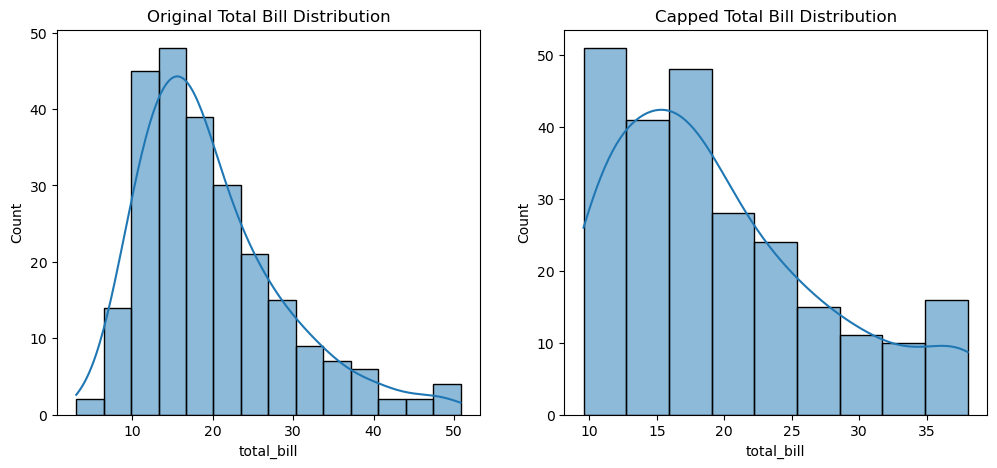

Original Data Statistics:
count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

Capped Data Statistics:
count    244.000000
mean      19.598076
std        7.961556
min        9.557500
25%       13.347500
50%       17.795000
75%       24.127500
max       38.061000
Name: total_bill, dtype: float64


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load a sample dataset (e.g., the 'tips' dataset from seaborn)
data = sns.load_dataset('tips')

# Display the first few rows of the dataset
print(data.head())

# Plot the original distribution of the 'total_bill' column
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['total_bill'], kde=True)
plt.title('Original Total Bill Distribution')

# Define a function to cap outliers based on a given percentile
def cap_outliers(df, column, lower_percentile=0.05, upper_percentile=0.95):
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)
    
    # Cap the values at the lower and upper bounds
    capped_df = df.copy()
    capped_df[column] = np.where(capped_df[column] < lower_bound, lower_bound,
                                 np.where(capped_df[column] > upper_bound, upper_bound, capped_df[column]))
    return capped_df

# Apply capping to the 'total_bill' column
capped_data = cap_outliers(data, 'total_bill', lower_percentile=0.05, upper_percentile=0.95)

# Plot the capped distribution of the 'total_bill' column
plt.subplot(1, 2, 2)
sns.histplot(capped_data['total_bill'], kde=True)
plt.title('Capped Total Bill Distribution')

plt.show()

# Compare some statistics before and after capping
print("Original Data Statistics:")
print(data['total_bill'].describe())

print("\nCapped Data Statistics:")
print(capped_data['total_bill'].describe())


## Replacing Outliers

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


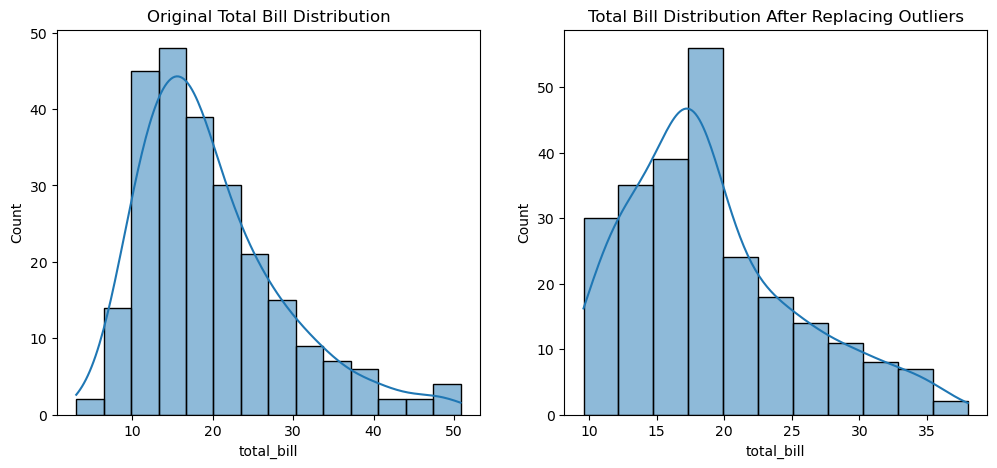

Original Data Statistics:
count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

Data Statistics After Replacing Outliers:
count    244.000000
mean      18.957213
std        6.300173
min        9.600000
25%       14.297500
50%       17.795000
75%       22.437500
max       38.010000
Name: total_bill, dtype: float64


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load a sample dataset (e.g., the 'tips' dataset from seaborn)
data = sns.load_dataset('tips')

# Display the first few rows of the dataset
print(data.head())

# Plot the original distribution of the 'total_bill' column
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['total_bill'], kde=True)
plt.title('Original Total Bill Distribution')

# Define a function to replace outliers with the median or mean
def replace_outliers(df, column, method='median', lower_percentile=0.05, upper_percentile=0.95):
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)
    
    if method == 'median':
        replacement_value = df[column].median()
    elif method == 'mean':
        replacement_value = df[column].mean()
    else:
        raise ValueError("Method must be 'median' or 'mean'")
    
    replaced_df = df.copy()
    replaced_df[column] = np.where((replaced_df[column] < lower_bound) | (replaced_df[column] > upper_bound),
                                   replacement_value, replaced_df[column])
    return replaced_df

# Apply replacing outliers with the median in the 'total_bill' column
replaced_data = replace_outliers(data, 'total_bill', method='median', lower_percentile=0.05, upper_percentile=0.95)

# Plot the distribution of the 'total_bill' column after replacing outliers
plt.subplot(1, 2, 2)
sns.histplot(replaced_data['total_bill'], kde=True)
plt.title('Total Bill Distribution After Replacing Outliers')

plt.show()

# Compare some statistics before and after replacing outliers
print("Original Data Statistics:")
print(data['total_bill'].describe())

print("\nData Statistics After Replacing Outliers:")
print(replaced_data['total_bill'].describe())


## Robust Regression

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
Huber Regressor - Mean Squared Error: 0.85, R-squared: 0.35
RANSAC Regressor - Mean Squared Error: 0.88, R-squared: 0.33


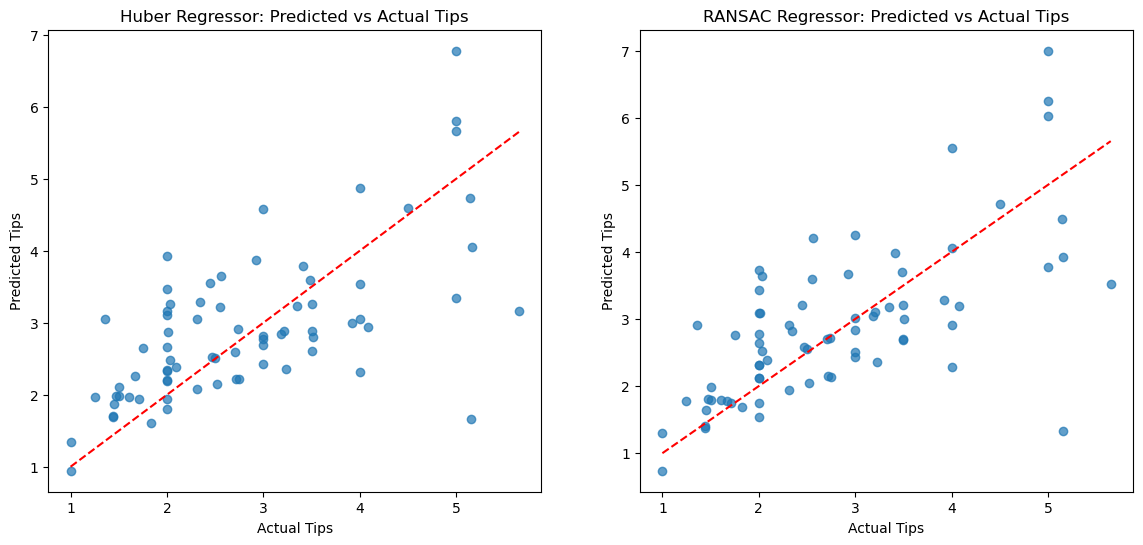

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import HuberRegressor, RANSACRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load a sample dataset (e.g., the 'tips' dataset from seaborn)
data = sns.load_dataset('tips')

# Display the first few rows of the dataset
print(data.head())

# Select the features and target variable
X = data[['total_bill', 'size']]
y = data['tip']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a Huber Regressor (a type of robust regression)
huber = HuberRegressor()
huber.fit(X_train, y_train)

# Predict and evaluate the Huber model
y_pred_huber = huber.predict(X_test)
huber_mse = mean_squared_error(y_test, y_pred_huber)
huber_r2 = r2_score(y_test, y_pred_huber)

# Fit a RANSAC Regressor (another type of robust regression)
ransac = RANSACRegressor()
ransac.fit(X_train, y_train)

# Predict and evaluate the RANSAC model
y_pred_ransac = ransac.predict(X_test)
ransac_mse = mean_squared_error(y_test, y_pred_ransac)
ransac_r2 = r2_score(y_test, y_pred_ransac)

# Print the evaluation metrics
print(f"Huber Regressor - Mean Squared Error: {huber_mse:.2f}, R-squared: {huber_r2:.2f}")
print(f"RANSAC Regressor - Mean Squared Error: {ransac_mse:.2f}, R-squared: {ransac_r2:.2f}")

# Plot the predictions vs actual values for both models
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_huber, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Huber Regressor: Predicted vs Actual Tips')
plt.xlabel('Actual Tips')
plt.ylabel('Predicted Tips')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ransac, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('RANSAC Regressor: Predicted vs Actual Tips')
plt.xlabel('Actual Tips')
plt.ylabel('Predicted Tips')

plt.show()


## Isolation Forest:

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


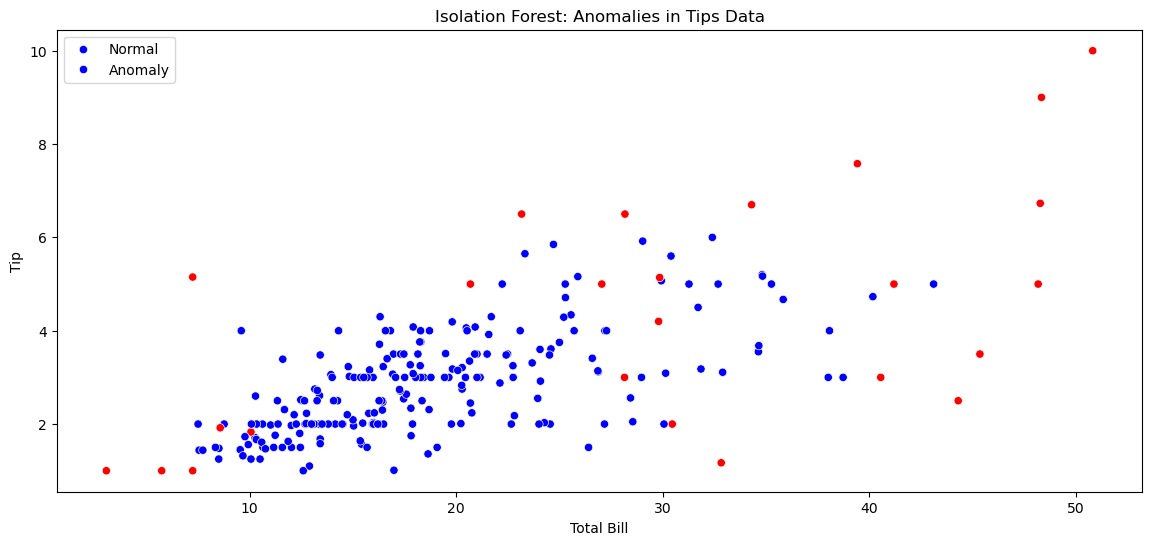

Number of anomalies detected: 25
Anomalies detected:
      total_bill    tip     sex smoker   day    time  size  anomaly
23        39.42   7.58    Male     No   Sat  Dinner     4        1
59        48.27   6.73    Male     No   Sat  Dinner     4        1
67         3.07   1.00  Female    Yes   Sat  Dinner     1        1
82        10.07   1.83  Female     No  Thur   Lunch     1        1
92         5.75   1.00  Female    Yes   Fri  Dinner     2        1
102       44.30   2.50  Female    Yes   Sat  Dinner     3        1
111        7.25   1.00  Female     No   Sat  Dinner     1        1
125       29.80   4.20  Female     No  Thur   Lunch     6        1
141       34.30   6.70    Male     No  Thur   Lunch     6        1
142       41.19   5.00    Male     No  Thur   Lunch     5        1
143       27.05   5.00  Female     No  Thur   Lunch     6        1
155       29.85   5.14  Female     No   Sun  Dinner     5        1
156       48.17   5.00    Male     No   Sun  Dinner     6        1
170     

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# Load a sample dataset (e.g., the 'tips' dataset from seaborn)
data = sns.load_dataset('tips')

# Display the first few rows of the dataset
print(data.head())

# Select the features for anomaly detection
X = data[['total_bill', 'tip', 'size']]

# Initialize the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

# Fit the model
iso_forest.fit(X)

# Predict anomalies
data['anomaly'] = iso_forest.predict(X)

# Convert anomaly labels: -1 for anomalies, 1 for normal points
data['anomaly'] = data['anomaly'].map({1: 0, -1: 1})

# Plot the original data with anomalies highlighted
plt.figure(figsize=(14, 6))
sns.scatterplot(x='total_bill', y='tip', hue='anomaly', palette={0: 'blue', 1: 'red'}, data=data)
plt.title('Isolation Forest: Anomalies in Tips Data')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.legend(['Normal', 'Anomaly'])
plt.show()

# Count the number of anomalies detected
print(f"Number of anomalies detected: {data['anomaly'].sum()}")

# Display the rows classified as anomalies
anomalies = data[data['anomaly'] == 1]
print("Anomalies detected:\n", anomalies)
